<a href="https://colab.research.google.com/github/jderazoa/algoritmodeprueba/blob/main/Taller_de_machine_learning_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Taller Machine Learning 
Johan David Erazo Avila
Marzo 2021 
> **El problema que se pretende resolver consiste en el pronostico del desempeño de los estudiantes que presentaron la prueba Saber Pro en el año 2019 en Bogota**. En otras palabras, a partir de las caracterısticas de los estudiantes se pretende estimar su desempeño en la prueba.

CARGANDO PAQUETES

In [ ]:
!pip install sweetviz
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1. Descargue los datos disponibles en este enlace.

In [ ]:
# 'https://drive.google.comu/c?id=1-8zVH3-KXEGLWSuxHKPyDcOnOYRRRgd2'
url = 'https://drive.google.com/uc?id=1-8zVH3-KXEGLWSuxHKPyDcOnOYRRRgd2'
df = pd.read_csv(url)
df

2. Realice un listado de las variables.
Si su tabla se llama df, puede usar el comando: 1 list ( df . columns ) para listarlas, observara que hay en total 106 variables.

In [ ]:
list(df.columns)

3. Tome una sola variable de salida, esta puede ser seleccionada de cualquiera de aquellas que comiencen con: MOD, PUNT o PERCENTIL.
4. Tome como variables de entrada (predictivas) maximo diez
que comiencen con: ESTU, FAMI o INST.
Se recomienda maximo diez variables para que la actividad no se extienda mas de la cuenta, sin embargo, puede tomar las que considere necesarias (incluso todas o solo una)
No utilice como variables de entrada cualquiera que mida el de sempeño del estudiante (dadas en el ıtem anterior), porque en un caso practico usted no dispondra de estas antes de la prueba.

In [ ]:
var_target = ['PUNT_GLOBAL']  # Variable objetivo
var_cat = ["FAMI_ESTRATOVIVIENDA"]
var_target+var_cat # Cuando se suman listas el resultado es la concatenación de las listas
df[var_target+var_cat]

5. Realice un analisis descriptivo de las variables seleccionadas en el ıtem anterior. Se recomienda realizar este analisis: (a) realizando un analisis individual de cada variable. (b) confrontando cada variable de entrada con la de salida. Nota: Este analisis debe incluir posibles problemas por falta de simetrıa, datos atıpicos o desbalance de clases, ademas escriba explıcitamente su posible correccion.

In [ ]:
import sweetviz as sv
reporte = sv.analyze(df[var_target+var_cat])

In [ ]:
from IPython.display import HTML
reporte.show_html()
HTML('SWEETVIZ_REPORT.html')

6. Si es necesario, transforme las variables de acuerdo al analisis anterior. Para esto puede utilizar

> i) el pipeline de sklearn
> ii) el mapper de sklearn-pandas o
> iii) simplemente construir una nueva tabla con los datos transformados.

In [ ]:
df.PUNT_GLOBAL.dtype

dtype('int64')

In [ ]:
print('Before')
colfix = 'PUNT_GLOBAL'
print(df[colfix].unique())
df[colfix] = df[colfix].fillna(1)
print('After')
print(df[colfix].unique())

In [ ]:
boxplot = df.boxplot(column=['PUNT_GLOBAL'])

In [ ]:
# Removing outliers at 99 % but this filtering is just artificial
q = df["PUNT_GLOBAL"].quantile(0.99)
dfTrainInlier = df[df["PUNT_GLOBAL"] < q]
boxplot = df.boxplot(column=['PUNT_GLOBAL'])

In [ ]:
df.PUNT_GLOBAL.describe(include = np.object)

In [ ]:
df.PUNT_GLOBAL.unique()

In [ ]:
df.PUNT_GLOBAL.plot.hist()

In [ ]:
# PROCESO DE ESCALAMIENTO DE LOS DATOS
import numpy as np
(df.PUNT_GLOBAL + 1).apply(np.log10).plot.hist(bins=50)

transformar variable FAMI_ESTRATOVIVIENDA



verificar valores nulos en la variables FAMI_ESTRATOVIVIENDA

In [ ]:
df['FAMI_ESTRATOVIVIENDA'].unique()

se observan que existen nan y valores sin estrato y la variables es de tipo texto


In [ ]:
df.FAMI_ESTRATOVIVIENDA.isnull().sum() # cantidad de valores nulos

In [ ]:
df.FAMI_ESTRATOVIVIENDA.fillna(1, inplace=True)
print(df.FAMI_ESTRATOVIVIENDA)

In [ ]:
df.FAMI_ESTRATOVIVIENDA.isnull().sum() # cantidad de valores nulos

0

la variable se convierte en categorica

In [ ]:
df.FAMI_ESTRATOVIVIENDA.astype('category').unique()

exportar el analisis a **excel**

In [ ]:
# df1=df[["PUNT_GLOBAL"]]
# df2=df[["FAMI_ESTRATOVIVIENDA"]]
# dataframes=[df1,df2]
# join=pd.concat(dataframes)
# join.to_excel("analisis.xlsx")

leer datos limpios

In [ ]:
url = 'https://drive.google.com/uc?id=1fdGnE1fVyxmxbzc0KHIOHpRZbRGgRi81'
df3 = pd.read_excel(url)
df3

modelaje

regresion lineal

In [ ]:
# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

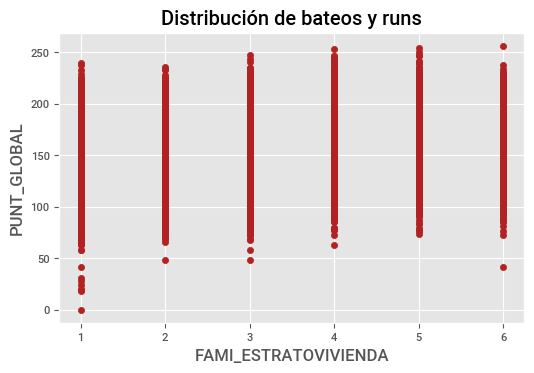

In [ ]:
# Gráfico
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84))

df3.plot(
    x    = 'FAMI_ESTRATOVIVIENDA',
    y    = 'PUNT_GLOBAL',
    c    = 'firebrick',
    kind = "scatter",
    ax   = ax
)
ax.set_title('Distribución de bateos y runs');

In [ ]:
# Correlación lineal entre las dos variables
# ==============================================================================
corr_test = pearsonr(x = df3['FAMI_ESTRATOVIVIENDA'], y =  df3['PUNT_GLOBAL'])
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])

Coeficiente de correlación de Pearson:  0.3248734004881335
P-value:  0.0


Scikit-learn

In [ ]:
# División de los datos en train y test
# ==============================================================================
X = df3[['FAMI_ESTRATOVIVIENDA']]
y = df3['PUNT_GLOBAL']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

# Creación del modelo
# ==============================================================================
modelo = LinearRegression()
modelo.fit(X = X_train.reshape(-1, 1), y = y_train)

LinearRegression()

In [ ]:
# Información del modelo
# ==============================================================================
print("Intercept:", modelo.intercept_)
print("Coeficiente:", list(zip(X.columns, modelo.coef_.flatten(), )))
print("Coeficiente de determinación R^2:", modelo.score(X, y))

Intercept: [129.53714291]
Coeficiente: [('FAMI_ESTRATOVIVIENDA', 7.31390040868812)]
Coeficiente de determinación R^2: 0.10554147037713846


In [ ]:
# Error de test del modelo 
# ==============================================================================
predicciones = modelo.predict(X = X_test)
print(predicciones[0:3,])

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")

[[151.47884414]
 [151.47884414]
 [151.47884414]]

El error (rmse) de test es: 22.885216127301536


conclusion

